In [121]:
from ipynb.fs.full.CovidReceptorExpressionAnalysis_Functions import *

In [122]:
def getDoM(gene,groups):
    #Create new z-score dataframe for each group
    group1_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(groups[0]).intersection(z_scores.columns))
    group1_z_scores = z_scores[group1_columns]
    group2_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(groups[1]).intersection(z_scores.columns))
    group2_z_scores = z_scores[group2_columns]
    
    #Get gene expression data for specified gene for each group
    group1_gene_expression_df = group1_z_scores.loc[group1_z_scores['Hugo_Symbol'] == gene]
    group1_gene_expression_values = group1_gene_expression_df.iloc[0,2:].values.astype(float)
    group2_gene_expression_df = group2_z_scores.loc[group2_z_scores['Hugo_Symbol'] == gene]
    group2_gene_expression_values = group2_gene_expression_df.iloc[0,2:].values.astype(float)
    
    
    ret =(np.mean(group1_gene_expression_values)- np.mean(group2_gene_expression_values))
    return(round_sig(ret,3))

In [123]:
from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [124]:
def getT(gene, groups):
    #Create new z-score dataframe for each group
    group1_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(groups[0]).intersection(z_scores.columns))
    group1_z_scores = z_scores[group1_columns]
    group2_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(groups[1]).intersection(z_scores.columns))
    group2_z_scores = z_scores[group2_columns]
    
    #Get gene expression data for specified gene for each group
    group1_gene_expression_df = group1_z_scores.loc[group1_z_scores['Hugo_Symbol'] == gene]
    group1_gene_expression_values = group1_gene_expression_df.iloc[0,2:].values.astype(float)
    group2_gene_expression_df = group2_z_scores.loc[group2_z_scores['Hugo_Symbol'] == gene]
    group2_gene_expression_values = group2_gene_expression_df.iloc[0,2:].values.astype(float)
    
    ret = (st.ttest_ind(group1_gene_expression_values,group2_gene_expression_values)[1])
    return(round_sig(ret,3))

In [125]:
c1_patients = pd.read_csv('c1.txt',header=None)[0].tolist()
c2_patients = pd.read_csv('allpat.txt',header=None)[0].tolist()

for i in range(len(c1_patients)):
    c1_patients[i] = ('TARGET-30-' + c1_patients[i])
for i in range(len(c2_patients)):
    c2_patients[i] = ('TARGET-30-' + c2_patients [i])

c1_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['#Patient Identifier'].isin(c1_patients)]['Sample Identifier']
c2_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['#Patient Identifier'].isin(c2_patients)]['Sample Identifier']





In [126]:
genes = ['ACE2','TMPRSS2','BSG','DPP4','PPIA','PPIB', 'IFITM2', 'IFITM3', 'CXCL10', 'CXCL11', 'AGTR1', 
        'NTRK1', 'MYCN', 'PTPN6', 'TP53']



for gene in genes:
    print(gene, '\t',getDoM(gene,[c1_samples,c2_samples]))

ACE2 	 -0.389
TMPRSS2 	 -0.342
BSG 	 -0.547
DPP4 	 -0.133
PPIA 	 -0.499
PPIB 	 -0.908
IFITM2 	 -0.346
IFITM3 	 -0.331
CXCL10 	 -0.234
CXCL11 	 -0.378
AGTR1 	 -0.121
NTRK1 	 1.08
MYCN 	 -0.393
PTPN6 	 -0.471
TP53 	 -0.797


In [127]:
for gene in genes:
    
    gt = getT(gene,[c1_samples,c2_samples])
    if gt >= 0.05:
        print (gene, '\t', gt)
    else:
        print(gene, '\t', gt)

ACE2 	 0.0236
TMPRSS2 	 0.0469
BSG 	 0.00153
DPP4 	 0.43
PPIA 	 0.00341
PPIB 	 2.15e-07
IFITM2 	 0.0385
IFITM3 	 0.0489
CXCL10 	 0.172
CXCL11 	 0.0265
AGTR1 	 0.477
NTRK1 	 4.98e-10
MYCN 	 0.0172
PTPN6 	 0.00516
TP53 	 2.82e-06


Cluster: median EFS = 2905.0, mean EFS = 2928.184210526316, 95% CI = (2440.167096990931, 3416.2013240617007)
Remaining: median EFS = 721.0, mean EFS = 1539.4696356275304, 95% CI = (1354.7937629686828, 1724.145508286378)
Ttest_indResult(statistic=5.3557502948763975, pvalue=1.7658149739484736e-07)


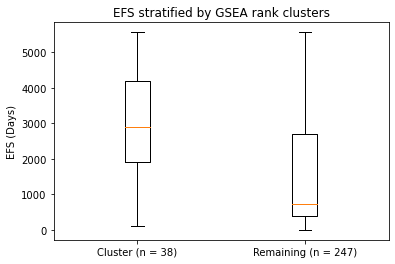

In [128]:
compareEFS([c1_samples,c2_samples], 'EFS stratified by GSEA rank clusters', 'Cluster', 'Remaining')

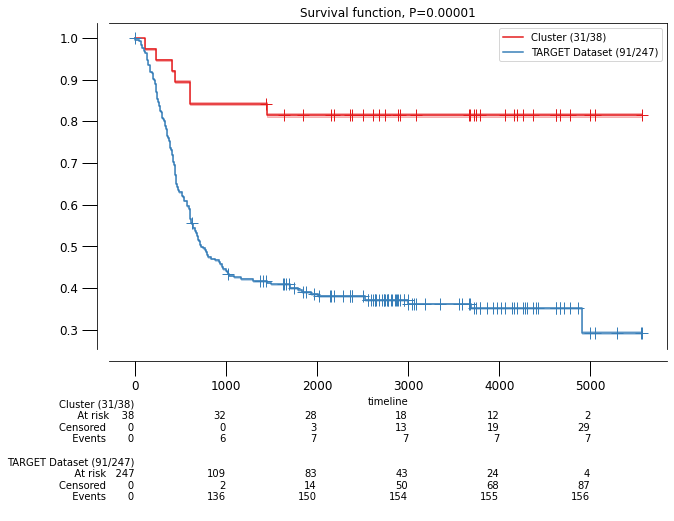

In [129]:
kaplanmeierEFS([c1_samples,c2_samples], 'Cluster', 'TARGET Dataset')

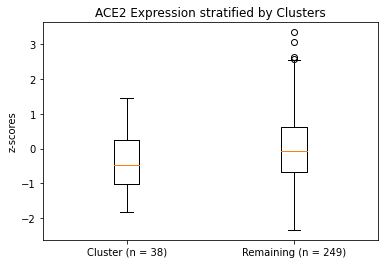

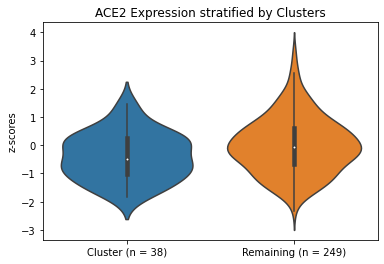

Cluster: median = -0.475, mean = -0.38863947368421053, 95% CI = (-0.6505310955957846, -0.12674785177263642)
Remaining: median = -0.0694, mean = -8.032128514215855e-07, 95% CI = (-0.12445874585833182, 0.12445713943262897)
Ttest_indResult(statistic=-2.275419258906443, pvalue=0.023623220427767905)


In [130]:
compareExpression('ACE2',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

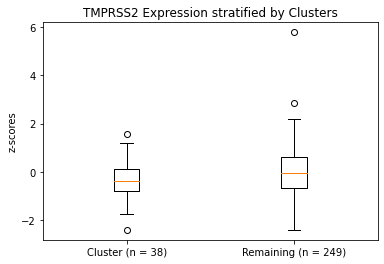

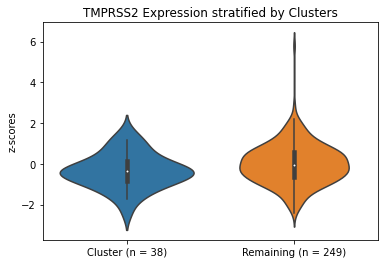

Cluster: median = -0.3685, mean = -0.3421526315789474, 95% CI = (-0.6139913349974584, -0.07031392816043636)
Remaining: median = -0.0537, mean = 8.032128513930496e-07, 95% CI = (-0.12445711284165684, 0.12445871926735963)
Ttest_indResult(statistic=-1.9961926679353885, pvalue=0.04686421567370004)


In [131]:
compareExpression('TMPRSS2',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

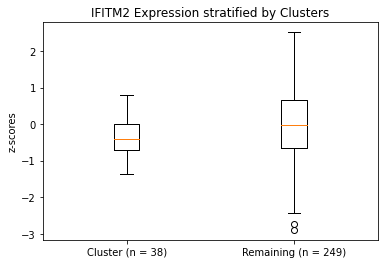

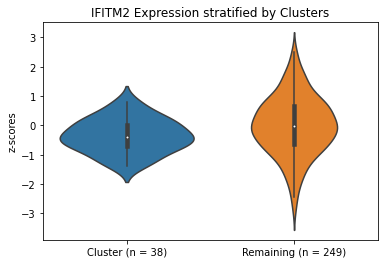

Cluster: median = -0.39905, mean = -0.34646052631578944, 95% CI = (-0.5268785002953403, -0.16604255233623855)
Remaining: median = -0.0188, mean = 8.032128514073175e-07, 95% CI = (-0.12445700147940347, 0.1244586079051063)
Ttest_indResult(statistic=-2.0791189702122157, pvalue=0.038500552146762825)


In [132]:
compareExpression('IFITM2', [c1_samples,c2_samples], 'Clusters', 'Cluster', 'Remaining')

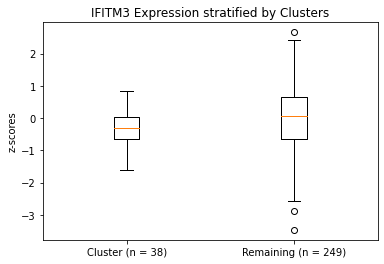

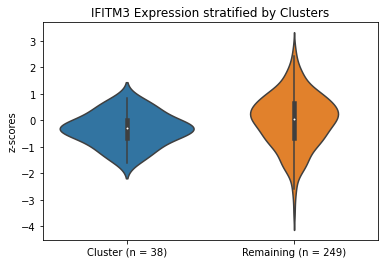

Cluster: median = -0.30574999999999997, mean = -0.33075789473684214, 95% CI = (-0.5240128650439355, -0.1375029244297488)
Remaining: median = 0.0543, mean = 3.6144578313311453e-06, 95% CI = (-0.1244546564974439, 0.12446188541310656)
Ttest_indResult(statistic=-1.9782524697372297, pvalue=0.048863045126058165)


In [133]:
compareExpression('IFITM3',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

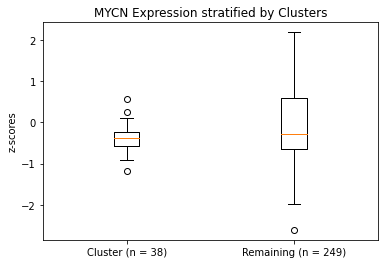

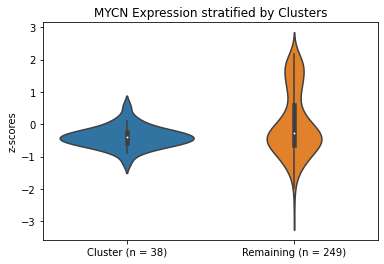

Cluster: median = -0.3892, mean = -0.3933894736842105, 95% CI = (-0.49779875594965806, -0.28898019141876297)
Remaining: median = -0.2762, mean = -1.2048192771198937e-06, 95% CI = (-0.124459735236203, 0.12445732559764876)
Ttest_indResult(statistic=-2.3973991363842155, pvalue=0.017155670257660936)


In [134]:
compareExpression('MYCN',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

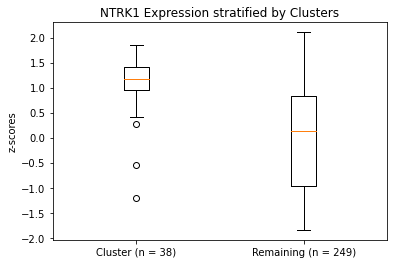

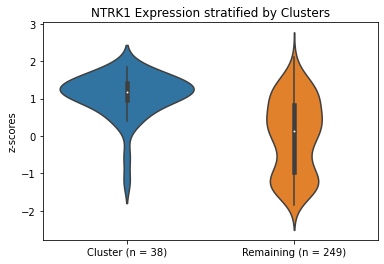

Cluster: median = 1.1649500000000002, mean = 1.07645, 95% CI = (0.8859652102528427, 1.266934789747157)
Remaining: median = 0.1392, mean = 1.2048192771198937e-06, 95% CI = (-0.1244566854814191, 0.12445909511997334)
Ttest_indResult(statistic=6.442927903019408, pvalue=4.978067888174475e-10)


In [135]:
compareExpression('NTRK1',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

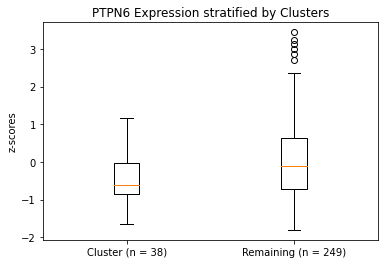

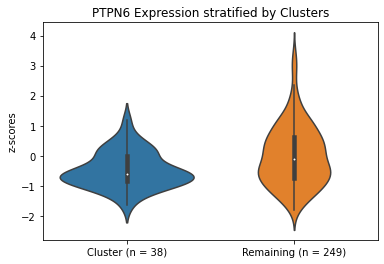

Cluster: median = -0.62225, mean = -0.4708263157894737, 95% CI = (-0.6600499665632875, -0.28160266501565995)
Remaining: median = -0.1149, mean = -4.417670682727762e-06, 95% CI = (-0.12446198867814713, 0.12445315333678168)
Ttest_indResult(statistic=-2.8189849944777605, pvalue=0.005155132545285275)


In [136]:
compareExpression('PTPN6',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

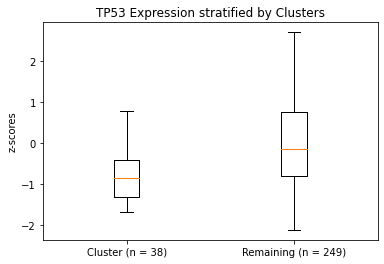

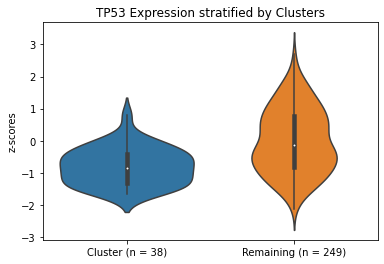

Cluster: median = -0.8402499999999999, mean = -0.7966394736842104, 95% CI = (-0.9779849879951799, -0.6152939593732409)
Remaining: median = -0.1481, mean = -2.008032128514727e-06, 95% CI = (-0.12445963624128796, 0.12445562017703092)
Ttest_indResult(statistic=-4.779513576838223, pvalue=2.8187628844822066e-06)


In [137]:
compareExpression('TP53',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

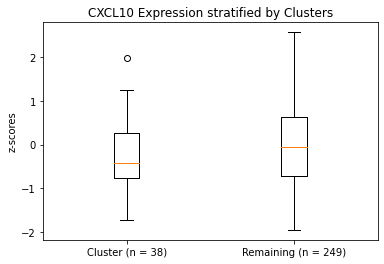

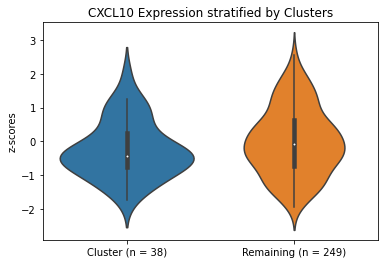

Cluster: median = -0.41705000000000003, mean = -0.23432631578947366, 95% CI = (-0.5004997580155519, 0.031847126436604645)
Remaining: median = -0.0646, mean = -2.008032128530778e-06, 95% CI = (-0.12446020011993368, 0.12445618405567661)
Ttest_indResult(statistic=-1.3698636824934634, pvalue=0.1718077047541072)


In [138]:
compareExpression('CXCL10',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

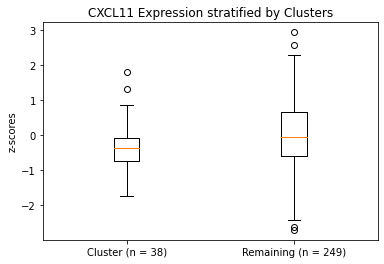

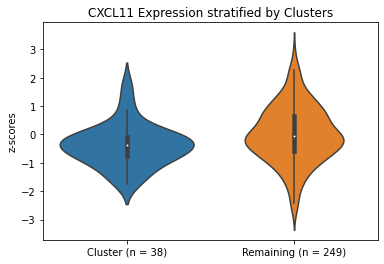

Cluster: median = -0.35405, mean = -0.3776842105263158, 95% CI = (-0.6145093021899593, -0.14085911886267233)
Remaining: median = -0.0556, mean = -1.6064257028057177e-06, 95% CI = (-0.12445983571338456, 0.12445662286197895)
Ttest_indResult(statistic=-2.229958633678072, pvalue=0.026529044834326374)


In [139]:
compareExpression('CXCL11',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

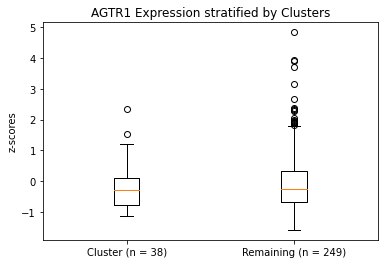

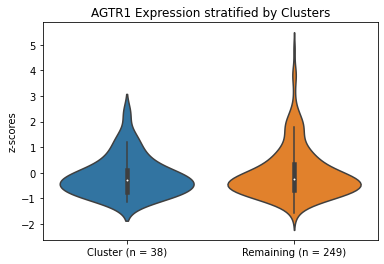

Cluster: median = -0.29125, mean = -0.12090526315789474, 95% CI = (-0.3659700425907557, 0.12415951627496621)
Remaining: median = -0.2605, mean = 4.0160642569117434e-07, 95% CI = (-0.12445733240726434, 0.1244581356201157)
Ttest_indResult(statistic=-0.7119514392918047, pvalue=0.47707722284156273)


In [140]:
compareExpression('AGTR1',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

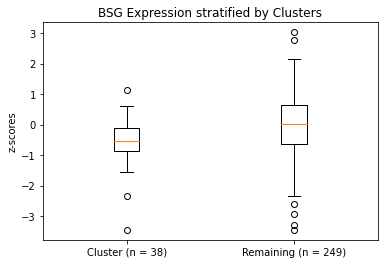

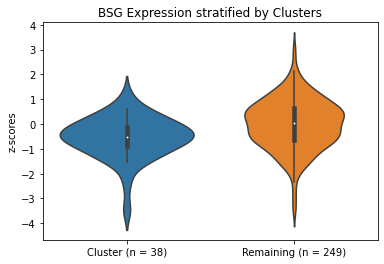

Cluster: median = -0.5301499999999999, mean = -0.5473631578947369, 95% CI = (-0.8134927537026739, -0.2812335620867999)
Remaining: median = 0.0265, mean = -1.4267926420885545e-17, 95% CI = (-0.1244575686819621, 0.12445756868196207)
Ttest_indResult(statistic=-3.1999580796743334, pvalue=0.0015297033135034423)


In [141]:
compareExpression('BSG',[c1_samples,c2_samples],'Clusters','Cluster','Remaining') 

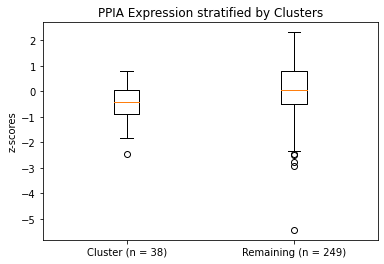

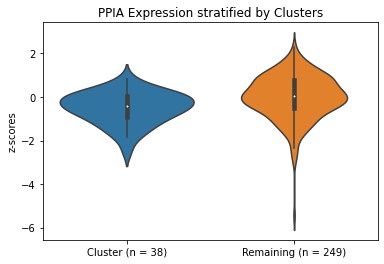

Cluster: median = -0.43410000000000004, mean = -0.4989710526315789, 95% CI = (-0.728199730032693, -0.26974237523046485)
Remaining: median = 0.0478, mean = -3.21285140562927e-06, 95% CI = (-0.12446102751468245, 0.1244546018118712)
Ttest_indResult(statistic=-2.9531818833210823, pvalue=0.00340719265720501)


In [142]:
compareExpression('PPIA',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

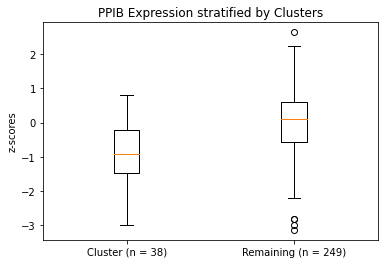

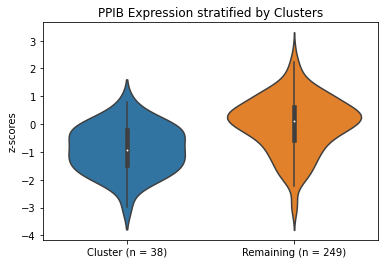

Cluster: median = -0.9218999999999999, mean = -0.908371052631579, 95% CI = (-1.1719866677849433, -0.6447554374782147)
Remaining: median = 0.1124, mean = -1.606425702803934e-06, 95% CI = (-0.12445927558864088, 0.12445606273723527)
Ttest_indResult(statistic=-5.315159124929029, pvalue=2.153672655770474e-07)


In [143]:
compareExpression('PPIB',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')

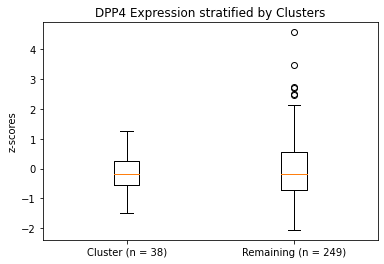

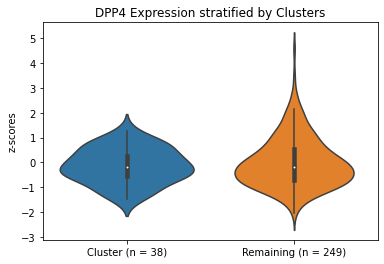

Cluster: median = -0.18015, mean = -0.13322894736842106, 95% CI = (-0.3554703064946827, 0.08901241175784058)
Remaining: median = -0.1717, mean = -4.016064256947413e-07, 95% CI = (-0.12445847400530236, 0.12445767079245096)
Ttest_indResult(statistic=-0.7902250767250993, pvalue=0.4300533512103)


In [144]:
compareExpression('DPP4',[c1_samples,c2_samples],'Clusters','Cluster','Remaining')